In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from feature_selector import FeatureSelector

In [2]:
train_df = pd.read_csv('/home/monster/Downloads/kaggle/AV-L&T-loan/train.csv')
test_df = pd.read_csv('/home/monster/Downloads/kaggle/AV-L&T-loan/test.csv')
sub_df = pd.read_csv('/home/monster/Downloads/kaggle/AV-L&T-loan/sample_submission.csv')

In [3]:
train_df.shape,test_df.shape

((233154, 41), (112392, 40))

In [4]:
train_df['is_train'] = ''
test_df['is_train'] = ''
data = pd.DataFrame()
train_df.loc[:,'is_train'] = 1
test_df.loc[:,'is_train'] = 0
data = data.append(train_df,sort=False).append(test_df,sort=False)

In [5]:
data.reset_index(inplace=True)

In [6]:
#Treat missing values
#86 % values are no so it is safe to impute NO
data['Employment.Type'].fillna('Self employed',inplace=True)

In [ ]:
data.apply(lambda x: sum(x.isnull()),axis=0)

In [7]:
data.shape,train_df.shape,test_df.shape

((345546, 43), (233154, 42), (112392, 41))

In [8]:
#create mean and st dev features- leakage features
ft_name = ['loan_default']
var = ['branch_id','State_ID']
fntouse = list([np.mean,np.sum])

# temp2 = data.pivot_table(values='ltv',index=['Current_pincode_ID'],aggfunc=np.std)
# # temp2.plot(kind='bar')
# temp2.reset_index(inplace=True)
# temp2.columns = ['Current_pincode_ID', 'ltv_stdev']
for ftname in ft_name:
    for fn2use in fntouse:
        for var_name in var:
            temp3 = train_df.pivot_table(values=ftname,index=[var_name],aggfunc=fn2use)
            # temp2.plot(kind='bar')
            temp3.reset_index(inplace=True)
            temp3.columns = [var_name, var_name+'_'+ftname+'_'+str(fn2use).split(' ')[1]]
            data = data.merge(temp3,on=var_name, how = 'left')
    #         data[var_name+'_stdev'] = data[ftname]-data[var_name+'_'+ftname+'_mean']

            # df = pd.concat([temp2,temp3],axis=1)

In [ ]:
data.apply(lambda x: sum(x.isnull()),axis=0)

In [ ]:
data.columns

In [9]:
data['CREDIT.HISTORY.LENGTH.YEARS'] = data['CREDIT.HISTORY.LENGTH'].map(lambda x : int(x.split(' ')[0][:-3]))

In [10]:
data['CREDIT.HISTORY.LENGTH.MONTHS'] = data['CREDIT.HISTORY.LENGTH'].map(lambda x : int(x.split(' ')[1][:-3]))

In [11]:
data['CREDIT.HISTORY.LENGTH.TOTMONS'] = data['CREDIT.HISTORY.LENGTH.MONTHS'] + np.dot(data['CREDIT.HISTORY.LENGTH.YEARS'],12)

In [12]:
data['AVERAGE.ACCT.AGE.YEARS'] = data['AVERAGE.ACCT.AGE'].map(lambda x : int(x.split(' ')[0][:-3]))

data['AVERAGE.ACCT.AGE.MONTHS'] = data['AVERAGE.ACCT.AGE'].map(lambda x : int(x.split(' ')[1][:-3]))

data['AVERAGE.ACCT.AGE.TOTMONS'] = data['AVERAGE.ACCT.AGE.MONTHS'] + np.dot(data['AVERAGE.ACCT.AGE.YEARS'],12)

In [ ]:
data['Date.of.Birth'][0]

In [13]:
data['Date.of.Birth.YEAR'] = data['Date.of.Birth'].map(lambda x : int(x.split('-')[2]))

In [14]:
data.loc[data['Date.of.Birth.YEAR']==0,'Date.of.Birth'].head()

874     16-07-00
1300    05-03-00
1864    01-01-00
1872    18-08-00
1874    01-01-00
Name: Date.of.Birth, dtype: object

In [15]:
data['Date.of.Birth.YEAR.conv'] = ''

In [16]:
data.loc[data['Date.of.Birth.YEAR']==0,'Date.of.Birth.YEAR.conv'] = 2000

In [17]:
data.loc[data['Date.of.Birth.YEAR']>0,'Date.of.Birth.YEAR.conv'] = data.loc[data['Date.of.Birth.YEAR']>0,'Date.of.Birth.YEAR']+1900

In [18]:
data['Date.of.Birth.AGE'] = ''

data['Date.of.Birth.AGE'] = 2019 - data.loc[:,'Date.of.Birth.YEAR.conv']

In [ ]:
#st dev and mean of ltv feature

In [ ]:
temp2 = data.pivot_table(values='loan_default',index=['branch_id'],aggfunc=np.mean)
# print('Frequency Table for Credit History:') 
# print(temp2)

# fig = plt.figure(figsize=(8,4))
# ax1 = fig.add_subplot(121)
# ax1.set_xlabel('Credit_History')
# ax1.set_ylabel('Count of Applicants')
# ax1.set_title("Applicants by Credit_History")
temp2.plot(kind='bar')



In [19]:
#create mean and st dev features


ft_name = ['disbursed_amount','asset_cost','ltv','PERFORM_CNS.SCORE','PRIMARY.INSTAL.AMT']


#All 208 features - aggregated

# ft_name = ['disbursed_amount','asset_cost','ltv','PERFORM_CNS.SCORE','PRIMARY.INSTAL.AMT',
#            'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
#        'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
#        'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
#        'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
#        'SEC.DISBURSED.AMOUNT', 'SEC.INSTAL.AMT',
#        'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',]


    
var = ['Current_pincode_ID','branch_id','supplier_id','manufacturer_id','State_ID','Employee_code_ID']
# temp2 = data.pivot_table(values='ltv',index=['Current_pincode_ID'],aggfunc=np.std)
# # temp2.plot(kind='bar')
# temp2.reset_index(inplace=True)
# temp2.columns = ['Current_pincode_ID', 'ltv_stdev']
for ftname in ft_name:
    for var_name in var:
        temp3 = data.pivot_table(values=ftname,index=[var_name],aggfunc=np.mean)
        # temp2.plot(kind='bar')
        temp3.reset_index(inplace=True)
        temp3.columns = [var_name, var_name+'_'+ftname+'_mean']
        data = data.merge(temp3,on=var_name, how = 'left')
        data[var_name+'_stdev'] = data[ftname]-data[var_name+'_'+ftname+'_mean']

        # df = pd.concat([temp2,temp3],axis=1)

In [ ]:
# data = data.merge(temp3,on='Current_pincode_ID', how = 'left')

In [ ]:
# data['ltv_stdev'] = data['ltv']-data['ltv_mean']

In [20]:
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace(' ', '_', regex=True)

In [21]:
#treat categorical variables
from sklearn.preprocessing import OneHotEncoder

d = pd.DataFrame()

var_mod = ['Employment.Type','PERFORM_CNS.SCORE.DESCRIPTION']

x = pd.get_dummies(data[var_mod])

data  = data.drop(var_mod,axis=1)
data = pd.concat([data,x], axis=1)
    
# for i in var_mod:
#     print(i)
# #     d[str(i)] 
#     dd = le.fit_transform(data.loc[:,i]).toarray()
#     print(dd.shape)
# d.dtypes


In [ ]:
data.shape

In [ ]:
data['ltv'].hist(bins=50)
plt.show()

In [ ]:
(data['ltv']**2).hist(bins=50)
plt.show()

In [ ]:
(data['ltv']**1/3).hist(bins=50)
plt.show()

In [22]:
data['log_disbursed_amount'] = np.log(data['disbursed_amount'])
data['log_asset_cost'] = np.log(data['asset_cost'])

In [23]:
data['ltv_squared'] = data['ltv']**2
data['log_ltv'] = np.log(data['ltv'])

In [24]:
data['DisbursalDate_month'] = data['DisbursalDate'].map(lambda x : int(x.split('-')[1]))
data['DisbursalDate_dayofmonth'] = data['DisbursalDate'].map(lambda x : int(x.split('-')[0]))

In [ ]:
type(data['AVERAGE.ACCT.AGE'][0])

In [ ]:
type(data['CREDIT.HISTORY.LENGTH'][0])

In [25]:
train_df = data.loc[data['is_train']==1,:]
train_df = train_df.drop(['is_train'],axis=1)

In [26]:
test_df = data.loc[data['is_train']==0,:]
test_df = test_df.drop(['is_train','loan_default'],axis=1)

In [ ]:
train_df.apply(lambda x: sum(x.isnull()),axis=0)

In [ ]:
test_df.apply(lambda x: sum(x.isnull()),axis=0)

In [ ]:
train_df.shape,test_df.shape

In [ ]:
list(train_df.columns)

In [96]:
predictors = [
#  'disbursed_amount',
 'asset_cost',
#  'ltv',
 'branch_id',
 'supplier_id',
 'manufacturer_id',
 'Current_pincode_ID',
 'State_ID',
 'Employee_code_ID',
#  'MobileNo_Avl_Flag',
 'Aadhar_flag',
 'PAN_flag',
 'VoterID_flag',
 'Driving_flag',
 'Passport_flag',
 'PERFORM_CNS.SCORE',
 'PRI.NO.OF.ACCTS',
 'PRI.ACTIVE.ACCTS',
 'PRI.OVERDUE.ACCTS',
 'PRI.CURRENT.BALANCE',
 'PRI.SANCTIONED.AMOUNT',
 'PRI.DISBURSED.AMOUNT',
 'SEC.NO.OF.ACCTS',
 'SEC.ACTIVE.ACCTS',
 'SEC.OVERDUE.ACCTS',
 'SEC.CURRENT.BALANCE',
 'SEC.SANCTIONED.AMOUNT',
 'SEC.DISBURSED.AMOUNT',
 'PRIMARY.INSTAL.AMT',
 'SEC.INSTAL.AMT',
 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
 'NO.OF_INQUIRIES',
 'branch_id_loan_default_mean',
 'State_ID_loan_default_mean',
 'branch_id_loan_default_sum',
 'State_ID_loan_default_sum',
 'CREDIT.HISTORY.LENGTH.YEARS',
 'CREDIT.HISTORY.LENGTH.MONTHS',
 'CREDIT.HISTORY.LENGTH.TOTMONS',
 'AVERAGE.ACCT.AGE.YEARS',
 'AVERAGE.ACCT.AGE.MONTHS',
 'AVERAGE.ACCT.AGE.TOTMONS',
 'Date.of.Birth.YEAR',
 'Date.of.Birth.YEAR.conv',
 'Date.of.Birth.AGE',
 'Current_pincode_ID_disbursed_amount_mean',
 'Current_pincode_ID_stdev',
 'branch_id_disbursed_amount_mean',
 'branch_id_stdev',
 'supplier_id_disbursed_amount_mean',
 'supplier_id_stdev',
 'manufacturer_id_disbursed_amount_mean',
 'manufacturer_id_stdev',
 'State_ID_disbursed_amount_mean',
 'State_ID_stdev',
 'Employee_code_ID_disbursed_amount_mean',
 'Employee_code_ID_stdev',
 'Current_pincode_ID_asset_cost_mean',
 'branch_id_asset_cost_mean',
 'supplier_id_asset_cost_mean',
 'manufacturer_id_asset_cost_mean',
 'State_ID_asset_cost_mean',
 'Employee_code_ID_asset_cost_mean',
 'Current_pincode_ID_ltv_mean',
 'branch_id_ltv_mean',
 'supplier_id_ltv_mean',
 'manufacturer_id_ltv_mean',
 'State_ID_ltv_mean',
 'Employee_code_ID_ltv_mean',
 'Current_pincode_ID_PERFORM_CNS.SCORE_mean',
 'branch_id_PERFORM_CNS.SCORE_mean',
 'supplier_id_PERFORM_CNS.SCORE_mean',
 'manufacturer_id_PERFORM_CNS.SCORE_mean',
 'State_ID_PERFORM_CNS.SCORE_mean',
 'Employee_code_ID_PERFORM_CNS.SCORE_mean',
 'Current_pincode_ID_PRIMARY.INSTAL.AMT_mean',
 'branch_id_PRIMARY.INSTAL.AMT_mean',
 'supplier_id_PRIMARY.INSTAL.AMT_mean',
 'manufacturer_id_PRIMARY.INSTAL.AMT_mean',
 'State_ID_PRIMARY.INSTAL.AMT_mean',
 'Employee_code_ID_PRIMARY.INSTAL.AMT_mean',
 'Employment.Type_Salaried',
 'Employment.Type_Self employed',
 'PERFORM_CNS.SCORE.DESCRIPTION_A-Very_Low_Risk',
 'PERFORM_CNS.SCORE.DESCRIPTION_B-Very_Low_Risk',
 'PERFORM_CNS.SCORE.DESCRIPTION_C-Very_Low_Risk',
 'PERFORM_CNS.SCORE.DESCRIPTION_D-Very_Low_Risk',
 'PERFORM_CNS.SCORE.DESCRIPTION_E-Low_Risk',
 'PERFORM_CNS.SCORE.DESCRIPTION_F-Low_Risk',
 'PERFORM_CNS.SCORE.DESCRIPTION_G-Low_Risk',
 'PERFORM_CNS.SCORE.DESCRIPTION_H-Medium_Risk',
 'PERFORM_CNS.SCORE.DESCRIPTION_I-Medium_Risk',
 'PERFORM_CNS.SCORE.DESCRIPTION_J-High_Risk',
 'PERFORM_CNS.SCORE.DESCRIPTION_K-High_Risk',
 'PERFORM_CNS.SCORE.DESCRIPTION_L-Very_High_Risk',
 'PERFORM_CNS.SCORE.DESCRIPTION_M-Very_High_Risk',
 'PERFORM_CNS.SCORE.DESCRIPTION_No_Bureau_History_Available',
#  'PERFORM_CNS.SCORE.DESCRIPTION_Not_Scored:_More_than_50_active_Accounts_found',
 'PERFORM_CNS.SCORE.DESCRIPTION_Not_Scored:_No_Activity_seen_on_the_customer_(Inactive)',
 'PERFORM_CNS.SCORE.DESCRIPTION_Not_Scored:_No_Updates_available_in_last_36_months',
 'PERFORM_CNS.SCORE.DESCRIPTION_Not_Scored:_Not_Enough_Info_available_on_the_customer',
 'PERFORM_CNS.SCORE.DESCRIPTION_Not_Scored:_Only_a_Guarantor',
 'PERFORM_CNS.SCORE.DESCRIPTION_Not_Scored:_Sufficient_History_Not_Available',
 'log_disbursed_amount',
#  'log_asset_cost',
#  'ltv_squared',
 'log_ltv',
 'DisbursalDate_month',
 'DisbursalDate_dayofmonth']

In [28]:

##Single best model predictors



# predictors = ['disbursed_amount', 'asset_cost', 'ltv',
#        'branch_id', 'supplier_id', 'manufacturer_id', 'Current_pincode_ID',
#        'State_ID', 'Employee_code_ID',
#        'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
#        'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE', 'PRI.NO.OF.ACCTS',
#        'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE',
#        'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS',
#        'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE',
#        'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT',
#        'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
#        'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'NO.OF_INQUIRIES',
#        'CREDIT.HISTORY.LENGTH.YEARS', 'CREDIT.HISTORY.LENGTH.MONTHS',
#        'CREDIT.HISTORY.LENGTH.TOTMONS', 'AVERAGE.ACCT.AGE.YEARS',
#        'AVERAGE.ACCT.AGE.MONTHS', 'AVERAGE.ACCT.AGE.TOTMONS',
#        'Date.of.Birth.YEAR', 'Date.of.Birth.YEAR.conv', 'Date.of.Birth.AGE',
#        'Employment.Type_Salaried', 'Employment.Type_Self employed',
#        'PERFORM_CNS.SCORE.DESCRIPTION_A-Very_Low_Risk',
#        'PERFORM_CNS.SCORE.DESCRIPTION_B-Very_Low_Risk',
#        'PERFORM_CNS.SCORE.DESCRIPTION_C-Very_Low_Risk',
#        'PERFORM_CNS.SCORE.DESCRIPTION_D-Very_Low_Risk',
#        'PERFORM_CNS.SCORE.DESCRIPTION_E-Low_Risk',
#        'PERFORM_CNS.SCORE.DESCRIPTION_F-Low_Risk',
#        'PERFORM_CNS.SCORE.DESCRIPTION_G-Low_Risk',
#        'PERFORM_CNS.SCORE.DESCRIPTION_H-Medium_Risk',
#        'PERFORM_CNS.SCORE.DESCRIPTION_I-Medium_Risk',
#        'PERFORM_CNS.SCORE.DESCRIPTION_J-High_Risk',
#        'PERFORM_CNS.SCORE.DESCRIPTION_K-High_Risk',
#        'PERFORM_CNS.SCORE.DESCRIPTION_L-Very_High_Risk',
#        'PERFORM_CNS.SCORE.DESCRIPTION_M-Very_High_Risk',
#        'PERFORM_CNS.SCORE.DESCRIPTION_No_Bureau_History_Available',
#        'PERFORM_CNS.SCORE.DESCRIPTION_Not_Scored:_More_than_50_active_Accounts_found',
#        'PERFORM_CNS.SCORE.DESCRIPTION_Not_Scored:_No_Activity_seen_on_the_customer_(Inactive)',
#        'PERFORM_CNS.SCORE.DESCRIPTION_Not_Scored:_No_Updates_available_in_last_36_months',
#        'PERFORM_CNS.SCORE.DESCRIPTION_Not_Scored:_Not_Enough_Info_available_on_the_customer',
#        'PERFORM_CNS.SCORE.DESCRIPTION_Not_Scored:_Only_a_Guarantor',
#        'PERFORM_CNS.SCORE.DESCRIPTION_Not_Scored:_Sufficient_History_Not_Available',
#        'log_disbursed_amount', 'log_asset_cost', 'DisbursalDate_month',
#        'DisbursalDate_dayofmonth','Current_pincode_ID_disbursed_amount_mean',
#  'Current_pincode_ID_stdev',
#  'branch_id_disbursed_amount_mean',
#  'branch_id_stdev',
#  'supplier_id_disbursed_amount_mean',
#  'supplier_id_stdev',
#  'manufacturer_id_disbursed_amount_mean',
#  'manufacturer_id_stdev',
#  'State_ID_disbursed_amount_mean',
#  'State_ID_stdev',
#  'Employee_code_ID_disbursed_amount_mean',
#  'Employee_code_ID_stdev',
#  'Current_pincode_ID_asset_cost_mean',
#  'branch_id_asset_cost_mean',
#  'supplier_id_asset_cost_mean',
#  'manufacturer_id_asset_cost_mean',
#  'State_ID_asset_cost_mean',
#  'Employee_code_ID_asset_cost_mean',
#  'Current_pincode_ID_ltv_mean',
#  'branch_id_ltv_mean',
#  'supplier_id_ltv_mean',
#  'manufacturer_id_ltv_mean',
#  'State_ID_ltv_mean',
#  'Employee_code_ID_ltv_mean',
#  'Current_pincode_ID_PERFORM_CNS.SCORE_mean',
#  'branch_id_PERFORM_CNS.SCORE_mean',
#  'supplier_id_PERFORM_CNS.SCORE_mean',
#  'manufacturer_id_PERFORM_CNS.SCORE_mean',
#  'State_ID_PERFORM_CNS.SCORE_mean',
#  'Employee_code_ID_PERFORM_CNS.SCORE_mean',
#  'Current_pincode_ID_PRIMARY.INSTAL.AMT_mean',
#  'branch_id_PRIMARY.INSTAL.AMT_mean',
#  'supplier_id_PRIMARY.INSTAL.AMT_mean',
#  'manufacturer_id_PRIMARY.INSTAL.AMT_mean',
#  'State_ID_PRIMARY.INSTAL.AMT_mean',
#  'Employee_code_ID_PRIMARY.INSTAL.AMT_mean','branch_id_loan_default_mean',
#        'State_ID_loan_default_mean', 'branch_id_loan_default_sum',
#        'State_ID_loan_default_sum','ltv_squared','log_ltv']


outcome = ['loan_default']

In [98]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(train_df[predictors], train_df[outcome], test_size=0.3, random_state=1234)

In [99]:
X_train.shape,X_validation.shape

((163207, 42), (69947, 42))

In [57]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import cross_validate
from sklearn import metrics 
from sklearn.model_selection import GridSearchCV   #Perforing grid search
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

In [ ]:

alg = XGBClassifier()

In [ ]:
#kf = loo.split(X_train_std[predictor_var])
kf = KFold(n_splits=10).split(X_train[['State_ID','branch_id']])
# ['branch_id', 'supplier_id', 'manufacturer_id', 'Current_pincode_ID','State_ID', 'Employee_code_ID']
error = []
# yavg = pd.DataFrame()

for train, test in kf:
    # Filter training data
    print("training stared")
    train_predictors = X_train[predictors].iloc[train,:]

    # The target we're using to train the algorithm.
    train_target = y_train.iloc[train].values

    # Training the algorithm using the predictors and target.
    alg.fit(train_predictors, train_target)
    y1 = alg.predict(X_train[predictors].iloc[test,:])
#     yavg = yavg.append(pd.Series(y1),ignore_index=True)

    #Record error from each cross-validation run
    error.append(metrics.roc_auc_score(y_train.iloc[test], y1))
    print('score for current fold',metrics.roc_auc_score(y_train.iloc[test], y1))
    print("training finished")
print ("Cross-Validation AUC Score : %f" % np.mean(error))


In [32]:
def modelfit(alg, dtrain,ytrain,dtest,ytest,test,sub_df, predictors,outcome_var,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=ytrain.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds,verbose_eval=True,
            show_stdv=True)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], ytrain,eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtest[predictors])
    dtrain_predprob = alg.predict_proba(dtest[predictors])[:,1]
    
    dtrain_predprob1 = alg.predict_proba(test[predictors])[:,1]
    sub_df['loan_default']= dtrain_predprob1
    sub_df.to_csv('sub1.csv',index=False)    
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(ytest.values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(ytest, dtrain_predprob))
                    
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')  
  

In [33]:
def modelfit_mod(alg, dtrain,ytrain,dtest,ytest,test,sub_df, predictors,outcome_var,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=ytrain.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds,verbose_eval=True,
            show_stdv=True)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], ytrain)
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtest[predictors])
    dtrain_predprob = alg.predict_proba(dtest[predictors])[:,1]
    
    dtrain_predprob1 = alg.predict_proba(test[predictors])[:,1]
#     sub_df['loan_default']= dtrain_predprob1
#     sub_df.to_csv('sub1.csv',index=False)    
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(ytest.values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(ytest, dtrain_predprob))
                    
#     feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
#     feat_imp.plot(kind='bar', title='Feature Importances')
#     plt.ylabel('Feature Importance Score')  
  

[0]	train-auc:0.604389+0.00191184	test-auc:0.601683+0.002534
[1]	train-auc:0.613671+0.00344063	test-auc:0.610323+0.00415648
[2]	train-auc:0.619054+0.00210949	test-auc:0.615289+0.00357365
[3]	train-auc:0.62152+0.00118036	test-auc:0.617899+0.00167271
[4]	train-auc:0.6225+0.000631539	test-auc:0.618772+0.00217464
[5]	train-auc:0.624102+0.000387153	test-auc:0.620697+0.00135444
[6]	train-auc:0.624541+0.000596362	test-auc:0.621037+0.00142272
[7]	train-auc:0.625316+0.000844097	test-auc:0.621486+0.00163763
[8]	train-auc:0.626886+0.000334378	test-auc:0.623035+0.000981644
[9]	train-auc:0.627528+0.000190167	test-auc:0.623801+0.00127272
[10]	train-auc:0.628598+0.000627757	test-auc:0.624685+0.00161706
[11]	train-auc:0.629722+0.000628231	test-auc:0.625429+0.00173595
[12]	train-auc:0.630189+0.000550001	test-auc:0.625829+0.0010778
[13]	train-auc:0.630898+0.000596218	test-auc:0.626516+0.00119057
[14]	train-auc:0.631821+0.000375509	test-auc:0.627246+0.00100893
[15]	train-auc:0.632529+0.000394868	test-auc

/home/monster/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/monster/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Model Report
Accuracy : 0.7835
AUC Score (Train): 0.660940
CPU times: user 2min 2s, sys: 256 ms, total: 2min 2s
Wall time: 2min 2s


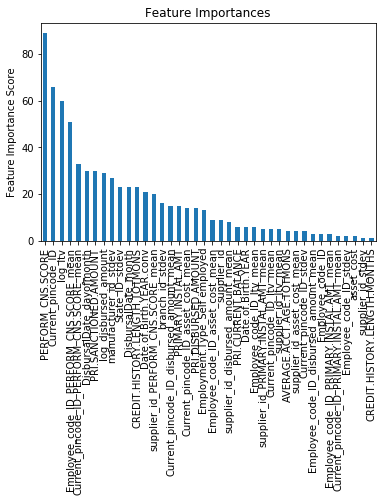

In [100]:
%%time
modelfit(XGBClassifier(), X_train,y_train,X_validation,y_validation,test_df,sub_df,predictors,outcome,useTrainCV=True, cv_folds=5, early_stopping_rounds=50)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model6 = RandomForestClassifier()

modelfit_mod(model6, X_train,y_train,X_validation,y_validation,test_df,sub_df,predictors,outcome,useTrainCV=False, cv_folds=5, early_stopping_rounds=50)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy',max_depth=6)
ada = AdaBoostClassifier(base_estimator=tree, n_estimators=29, learning_rate=0.1, random_state=0)

modelfit_mod(ada, X_train,y_train,X_validation,y_validation,test_df,sub_df,predictors,outcome,useTrainCV=False, cv_folds=5, early_stopping_rounds=50)

In [ ]:
%%time

from sklearn.ensemble import VotingClassifier

model9 = VotingClassifier(estimators=[('RF', model6),('Xgb', XGBClassifier()), ('adaboost', ada)], voting='soft')

modelfit_mod(model9, X_train,y_train,X_validation,y_validation,test_df,sub_df,predictors,outcome,useTrainCV=False, cv_folds=5, early_stopping_rounds=50)

In [101]:
# Feature Importance
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
# from sklearn import metrics
# from sklearn.ensemble import ExtraTreesClassifier
# load the iris datasets
# dataset = datasets.load_iris()
# fit an Extra Trees model to the data
model = RandomForestClassifier()
model.fit(X_train, y_train)
# display the relative importance of each attribute
print(model.feature_importances_)

/home/monster/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/monster/.conda/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


[0.04435253 0.02316933 0.0305265  0.02653066 0.020291   0.01323873
 0.01406983 0.01311056 0.00155935 0.00944875 0.0108255  0.01471242
 0.01423724 0.03112729 0.03082794 0.03074285 0.02899591 0.02843346
 0.0176812  0.02141067 0.02263985 0.01525911 0.01480965 0.02387223
 0.02455769 0.02846488 0.02241882 0.0251811  0.02958412 0.02217681
 0.0256612  0.03282145 0.02509268 0.02896133 0.02887504 0.0206477
 0.02415447 0.00601111 0.04975969 0.05499912 0.01144517 0.03731503]


In [102]:
fimp = pd.Series(X_train.columns)

d = pd.concat([fimp,pd.Series(model.feature_importances_)],axis=1)

In [103]:
df = d.sort_values(by=1,ascending=False).reset_index().drop(['index'],axis=1)

In [104]:
df.columns = ['ftname','ftimp']

In [105]:
df

,ftname,ftimp
0,log_ltv,0.054999
1,log_disbursed_amount,0.049760
2,asset_cost,0.044353
3,DisbursalDate_dayofmonth,0.037315
4,Current_pincode_ID_PERFORM_CNS.SCORE_mean,0.032821
5,Date.of.Birth.YEAR,0.031127
6,Date.of.Birth.YEAR.conv,0.030828
7,Date.of.Birth.AGE,0.030743
8,Current_pincode_ID,0.030526
9,Current_pincode_ID_ltv_mean,0.029584


In [106]:
toptfs = list(df.loc[df['ftimp']<=0.01,:]['ftname'])

In [107]:
toptfs

['PRIMARY.INSTAL.AMT', 'Employment.Type_Self employed', 'SEC.DISBURSED.AMOUNT']

In [ ]:
modelfit(XGBClassifier(), X_train,y_train,X_validation,y_validation,test_df,sub_df,toptfs,outcome,useTrainCV=True, cv_folds=5, early_stopping_rounds=50)

In [ ]:
model1 = XGBClassifier(
 learning_rate =0.2,
 n_estimators=500,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=-1,
 scale_pos_weight=1,
 seed=27)

In [ ]:
%%time
#replce top_20_ft with predictors to run model on all the features
modelfit(model1, X_train,y_train,X_validation,y_validation,test_df,sub_df,predictors,outcome,useTrainCV=True, cv_folds=5, early_stopping_rounds=50)

In [ ]:
%%time
#replce top_20_ft with predictors to run model on all the features
modelfit(model1, X_train,y_train,X_validation,y_validation,test_df,sub_df,toptfs,outcome,useTrainCV=True, cv_folds=5, early_stopping_rounds=50)

In [ ]:
top_20_features = pd.Series(model1.get_booster().get_fscore()).sort_values(ascending=False)[:25]

In [ ]:
top_20_ft = list(top_20_features.index)

In [ ]:
top_20_ft

In [ ]:
%%time
#top features only
modelfit(model1, X_train,y_train,X_validation,y_validation,test_df,sub_df,top_20_ft,outcome,useTrainCV=True, cv_folds=5, early_stopping_rounds=50)

In [ ]:
%%time
#top features only
modelfit(model1, X_train,y_train,X_validation,y_validation,test_df,sub_df,top_20_ft,outcome,useTrainCV=True, cv_folds=5, early_stopping_rounds=50)

In [ ]:
from sklearn.metrics import roc_curve, auc
def Performance(Model,Y,X):
    # Perforamnce of the model
    fpr, tpr, _ = roc_curve(Y, Model.predict_proba(X)[:,1])
    AUC  = auc(fpr, tpr)
    print ('the AUC is : %0.4f' %  AUC)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % AUC)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
Performance(model1,y_validation,X_validation)

In [ ]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

In [ ]:
%%time
np.linspace(0,1,11)

In [ ]:
%%time
from sklearn.model_selection import cross_val_score
def acc_model(params):
    clf = XGBClassifier(**params)
    return cross_val_score(clf, X_train, y_train, scoring='roc_auc',cv=5).mean()

param_space = {
    'learning_rate': hp.choice('learning_rate', [0.1,0.1]),#np.linspace(0,1,11)),
    
    'n_estimators': hp.choice('n_estimators', [300,300]),
    
    'max_depth': hp.choice('max_depth', [3, 5, 7, 9]), #range(1,20)),
                               
    'min_child_weight': hp.choice('min_child_weight', [1, 3, 5]), #range(1,7)),
    
    'gamma': hp.choice('gamma', [0,0]),#np.linspace(0,1,11)),
    
    'subsample': hp.choice('subsample', [0.8,0.8]),#np.linspace(0,1,11)),
    
    'colsample_bytree': hp.choice('colsample_bytree',[0.8,0.8])# np.linspace(0,1,11)),
    
#     'max_features': hp.choice('max_features', range(1,55)),
    
#     'criterion': hp.choice('criterion', ["gini", "entropy"])
#                        
     }

best = 0
def f(params):
    global best
    acc = acc_model(params)
    if acc > best:
        best = acc
    print ('new best:', best, params)
    return {'loss': -acc, 'status': STATUS_OK}

trials = Trials()
best = fmin(f, param_space, algo=tpe.suggest, max_evals=5, trials=trials)
print ('best:')
print (best)


In [ ]:
from sklearn.model_selection import learning_curve, GridSearchCV

In [ ]:
%%time
param_test1 = {
 'max_depth':[3, 5, 7],
 'min_child_weight':[1, 3, 5]
}

gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=118, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=6, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=6,iid=False, cv=5)
gsearch1.fit(X_train,y_train)
print(gsearch1.best_params_, gsearch1.best_score_)


In [ ]:
param_test1 = {
 'max_depth':[3, 5, 7],
 'min_child_weight':[1, 3, 5]
}

gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=118, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=6, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=6,iid=False, cv=5)
gsearch1.fit(X_train,y_train)
print(gsearch1.best_params_, gsearch1.best_score_)


In [ ]:
gsearch1.best_params_

In [ ]:
gsearch1.best_score_

In [ ]:
param_test2 = {
 'max_depth':[4, 5, 6],
 'min_child_weight':[4,5,6]
}

gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=118, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=6, scale_pos_weight=1, seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=6,iid=False, cv=5)
gsearch1.fit(X_train,y_train)

print(gsearch1.best_params_, gsearch1.best_score_)

In [ ]:
param_test2b = {
 'min_child_weight':[5,6,7,8,9]
}

gsearch2b = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=118, max_depth=6,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=6, scale_pos_weight=1,seed=27), 
 param_grid = param_test2b, scoring='roc_auc',n_jobs=6,iid=False, cv=5)
gsearch2b.fit(X_train,y_train)

print(gsearch2b.best_params_, gsearch2b.best_score_)

In [ ]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=118, max_depth=6,
 min_child_weight=8, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=-1, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_train,y_train)

print(gsearch3.best_params_, gsearch3.best_score_)


In [ ]:
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=6,
 min_child_weight=8,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

In [ ]:
modelfit(xgb1, X_train,y_train,X_validation,y_validation,test_df,sub_df,predictors,outcome,useTrainCV=True, cv_folds=5, early_stopping_rounds=50)

In [ ]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}

gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=200, max_depth=6,
 min_child_weight=8, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=-1, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(X_train,y_train)

print(gsearch4.best_params_, gsearch4.best_score_)


In [ ]:
param_test5 = {
 'subsample':[i/100.0 for i in range(85,100,5)],
 'colsample_bytree':[i/100.0 for i in range(65,80,5)]
}

gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=200, max_depth=6,
 min_child_weight=8, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch5.fit(X_train,y_train)
print(gsearch5.best_params_, gsearch5.best_score_)


In [ ]:
# param_test6 = {
#  'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
# }

# gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=200, max_depth=6,
#  min_child_weight=8, gamma=0, subsample=0.95, colsample_bytree=0.7,
#  objective= 'binary:logistic', nthread=-1, scale_pos_weight=1,seed=27), 
#  param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

# gsearch6.fit(X_train,y_train)


# print(gsearch6.best_params_, gsearch6.best_score_)

In [ ]:
# param_test7 = {
#  'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05,0.09]
# }

# gsearch7 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=200, max_depth=6,
#  min_child_weight=8, gamma=0.1,subsample=0.95, colsample_bytree=0.7,
#  objective= 'binary:logistic', nthread=-1, scale_pos_weight=1,seed=27), 
#  param_grid = param_test7, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
# gsearch7.fit(X_train,y_train)

# print(gsearch7.best_params_, gsearch7.best_score_)


In [110]:
xgb4 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=50,
 max_depth=6,
 min_child_weight=8,
 gamma=0,
 subsample=0.9,
 colsample_bytree=1,
 objective= 'binary:logistic',
 nthread=-1,
 scale_pos_weight=1,
 seed=27)


[0]	train-auc:0.635303+0.001539	test-auc:0.621358+0.0018295
[1]	train-auc:0.645787+0.00103031	test-auc:0.630537+0.00195317
[2]	train-auc:0.650116+0.00139175	test-auc:0.633182+0.00196781
[3]	train-auc:0.65316+0.000843062	test-auc:0.635472+0.00115545
[4]	train-auc:0.655292+0.000991109	test-auc:0.636952+0.00166309
[5]	train-auc:0.657572+0.000922207	test-auc:0.638385+0.00145036
[6]	train-auc:0.659321+0.000807155	test-auc:0.639419+0.00133391
[7]	train-auc:0.66072+0.000738039	test-auc:0.640228+0.00147219
[8]	train-auc:0.662134+0.000637591	test-auc:0.641102+0.00152232
[9]	train-auc:0.66346+0.000147882	test-auc:0.641967+0.00165615
[10]	train-auc:0.664844+0.000409894	test-auc:0.642924+0.00156477
[11]	train-auc:0.666186+0.00056718	test-auc:0.643974+0.00161264
[12]	train-auc:0.667574+0.000555912	test-auc:0.644844+0.00150038
[13]	train-auc:0.669199+0.000494893	test-auc:0.645817+0.00164419
[14]	train-auc:0.670396+0.000642458	test-auc:0.646318+0.00141857
[15]	train-auc:0.671854+0.00047768	test-auc:0

/home/monster/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/monster/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Model Report
Accuracy : 0.7837
AUC Score (Train): 0.665473


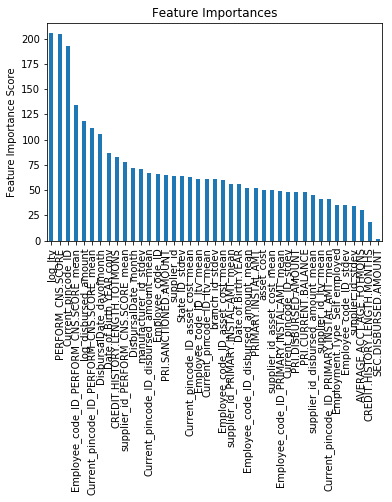

In [111]:
modelfit(xgb4, X_train,y_train,X_validation,y_validation,test_df,sub_df,predictors,outcome,useTrainCV=True, cv_folds=5, early_stopping_rounds=50)

In [40]:
from feature_selector import FeatureSelector
# Features are in train and labels are in train_labels
fs = FeatureSelector(data = train_df, labels = train_df.loan_default)

In [41]:
fs.identify_missing(missing_threshold = 0.6)

0 features with greater than 0.60 missing values.



In [42]:
fs.identify_collinear(correlation_threshold = 0.98)

12 features with a correlation magnitude greater than 0.98.



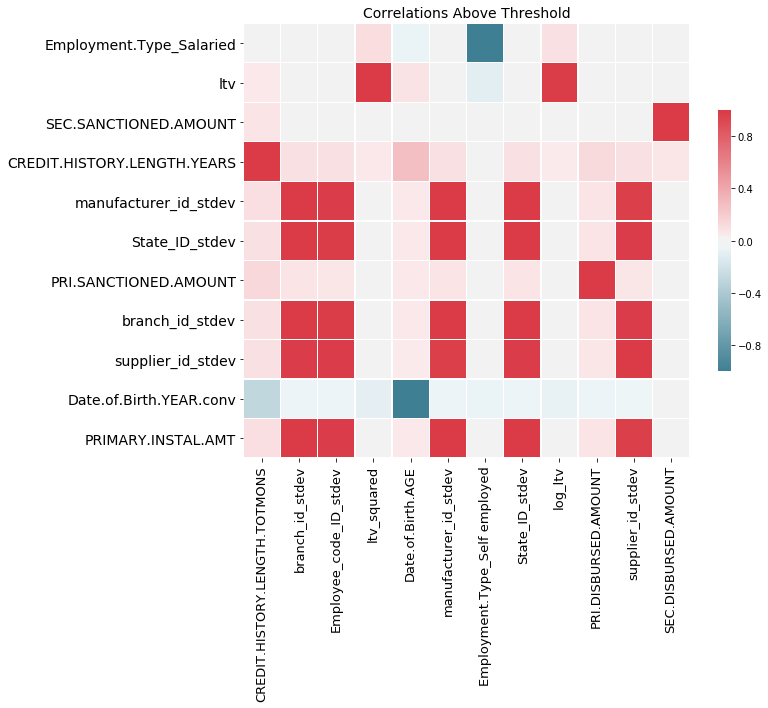

In [43]:
fs.plot_collinear()

In [44]:
# list of collinear features to remove
collinear_features = fs.ops['collinear']

In [51]:
# dataframe of collinear features
l2 = list(fs.record_collinear['drop_feature'])

In [85]:
predictors = [x for x in predictors if x not in l2]

In [97]:
predictors = [x for x in predictors if x not in toptfs]

In [82]:
l2.remove('log_ltv')

In [83]:
l2

['PRI.DISBURSED.AMOUNT',
 'SEC.DISBURSED.AMOUNT',
 'CREDIT.HISTORY.LENGTH.TOTMONS',
 'Date.of.Birth.AGE',
 'branch_id_stdev',
 'supplier_id_stdev',
 'manufacturer_id_stdev',
 'manufacturer_id_stdev',
 'State_ID_stdev',
 'State_ID_stdev',
 'State_ID_stdev',
 'State_ID_stdev',
 'Employee_code_ID_stdev',
 'Employee_code_ID_stdev',
 'Employee_code_ID_stdev',
 'Employee_code_ID_stdev',
 'Employment.Type_Self employed',
 'ltv_squared']

In [ ]:
predictorsictors

In [ ]:
# Pass in the appropriate parameters
fs.identify_zero_importance(task = 'classification', 
                            eval_metric = 'auc', 
                            n_iterations = 1, 
                             early_stopping = True)
# list of zero importance features
zero_importance_features = fs.ops['zero_importance']

In [ ]:
fs.identify_low_importance(cumulative_importance = 0.99)